In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from scipy import integrate
from statistics import mean
from pandas import *

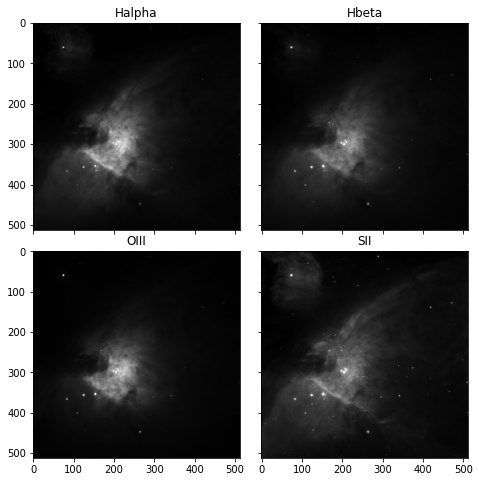

In [2]:
img_Halpha = cv2.imread('Halpha.jpg',0)
img_Hbeta  = cv2.imread('Hbeta.jpg',0)
img_OIII   = cv2.imread('OIII.jpg',0)
img_SII    = cv2.imread('SII.jpg',0)
imglist    = [img_Halpha, img_Hbeta, img_OIII, img_SII]

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
                 )
i = 0
title_list = ['Halpha','Hbeta','OIII','SII']
for ax, im in zip(grid, [img_Halpha, img_Hbeta, img_OIII, img_SII]):
    ax.imshow(im,cmap = 'gray')
    title = title_list[i]
    ax.set_title(title);
    i += 1
plt.savefig("Extinction_Corrected", dpi=1000, bbox_inches='tight')
plt.show()

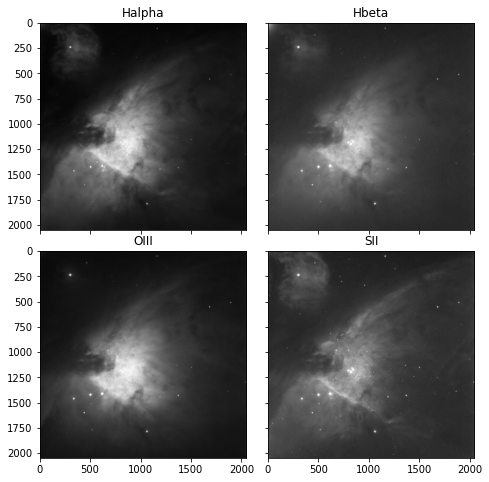

In [7]:
img_Halpha0 = cv2.imread('Halpha0.jpg',0)
img_Hbeta0  = cv2.imread('Hbeta0.jpg',0)
img_OIII0   = cv2.imread('OIII0.jpg',0)
img_SII0    = cv2.imread('SII0.jpg',0)
imglist    = [img_Halpha0, img_Hbeta0, img_OIII0, img_SII0]

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
                 )
i = 0
title_list = ['Halpha','Hbeta','OIII','SII']
for ax, im in zip(grid, [img_Halpha0, img_Hbeta0, img_OIII0, img_SII0]):
    ax.imshow(im,cmap = 'gray')
    title = title_list[i]
    ax.set_title(title);
    i += 1
plt.savefig("RAW_image", dpi=1000, bbox_inches='tight')
plt.show()

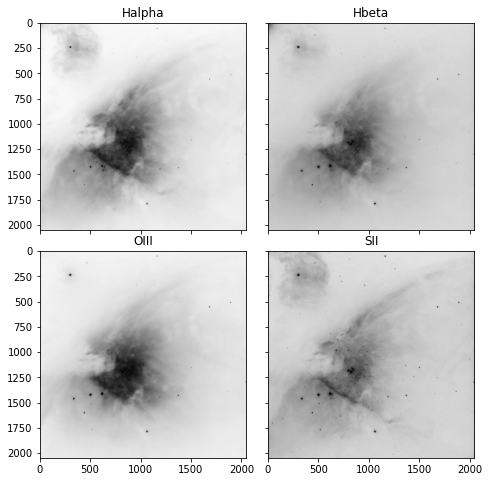

In [4]:
def negative(imagelist, img_neg):
    for i in range(len(imagelist)):
        x = imagelist[i][:,:]
        y = np.shape(x)
        z = np.zeros(y)
        z = 255-x
        img_neg.append(z)
        
img_neg = []
negative(imglist, img_neg)
fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
                 )
i = 0
title_list = ['Halpha','Hbeta','OIII','SII']
for ax, im in zip(grid, img_neg):
    ax.imshow(im, cmap='gray')
    title = title_list[i]
    ax.set_title(title);
    i += 1
plt.savefig("NEG", dpi=1000, bbox_inches='tight')
plt.show()

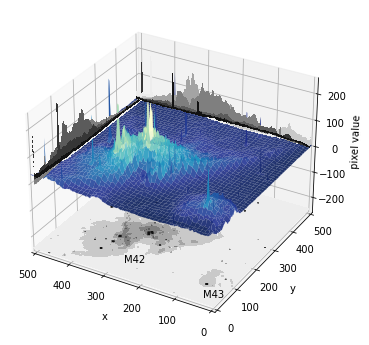

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.mgrid[0:img_SII.shape[0], 0:img_SII.shape[1]]
ax.plot_surface(xx,yy,img_SII, cmap='YlGnBu_r',alpha=0.9,linewidth=0)
cset = ax.contourf(xx,yy,img_SII, zdir='z',offset=-250, cmap='gist_yarg')
cset = ax.contourf(xx,yy,img_SII, zdir='x',offset=500, cmap='gist_yarg')
cset = ax.contourf(xx,yy,img_SII, zdir='y',offset=500, cmap='gist_yarg')
fig.set_size_inches(6, 6)
ax.set_ylim(0,500) # the surface motion may be superluminal 
ax.set_xlim(500,0) # impactor may be off center
ax.setTitle("The Attenuation Rate")
ax.setLabel("The Accretion Rate") # to set the label in 
ax.set_zlim(-250, 250)
ax.text(40, 20, -250, 'M43')
ax.text(280, 55, -250, 'M42') 
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10) 
ax.set_zlabel('pixel value', fontsize=10)
plt.savefig("SII", dpi=1000, bbox_inches='tight')

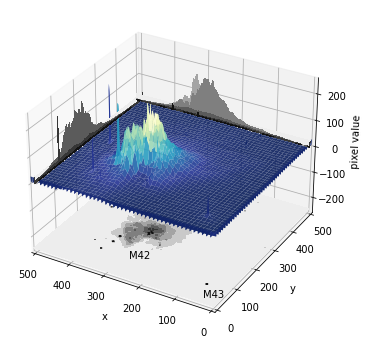

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.mgrid[0:img_OIII.shape[0], 0:img_OIII.shape[1]]
ax.plot_surface(xx,yy,img_OIII, cmap='YlGnBu_r',alpha=0.9,linewidth=0)
cset = ax.contourf(xx,yy,img_OIII, zdir='z',offset=-250, cmap='gist_yarg')
cset = ax.contourf(xx,yy,img_OIII, zdir='x',offset=500, cmap='gist_yarg')
cset = ax.contourf(xx,yy,img_OIII, zdir='y',offset=500, cmap='gist_yarg')
fig.set_size_inches(6, 6)
ax.set_ylim(0,500)
ax.set_xlim(500,0)
ax.set_zlim(-250, 250)
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.text(40, 20, -250, 'M43')
ax.text(280, 75, -250, 'M42')
ax.set_zlabel('pixel value', fontsize=10)
plt.savefig("OIII", dpi=1000, bbox_inches='tight')